# Model Comparison

Train and evaluate KNN, Random Forest and different Neural Networks on several Datasets of the same regression function to compare their performance.

Additionally fit changs dnn.

Results can be found in /results/....csv

In [1]:
# Setup
print('Setting up...')
import sys
import os

# Add the 'models' directory to the Python path
project_dir = os.path.dirname(os.path.dirname(os.path.abspath('generate_data.ipynb')))
models_path = os.path.join(project_dir, 'models')
sys.path.append(models_path)

# Now you can import models
print('Importing models...')
from knn import train_knn, generate_neighbors
from random_forest import train_rf, generate_trees
from neural_networks import neural_net, train_neural_net
from dnn import train_dnn

# Import the evaluation module
src_dir = os.path.join(project_dir, 'src')
sys.path.append(src_dir)

print('Importing evaluation module...')
from utils import evaluate
from data import load_data, get_predefined_split

# Import other packages
print('Importing other packages...')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('Setup complete.')

Setting up...
Importing models...
Importing evaluation module...
Importing other packages...
Setup complete.


In [2]:
def save_results(results, save_path):
    save_dir = os.path.join(project_dir, save_path)
    np.savez(save_dir, results=results)

# KNN Regression

In [3]:
def knn_run(n_samples, sigma, save=False):
    data_dir = os.path.join(project_dir, 'data')
    results = []
    
    scaler_file = os.path.join(data_dir, f'error_scaler_sigma{sigma}_samples{n_samples}.npz')
    error_scaler = np.load(scaler_file)['error_scaler']

    for i in range(50):
        print('Loading data file {}...'.format(i))
        data_file = os.path.join(data_dir, f'data_sigma{sigma}_samples{n_samples}_{i}.npz')
        X, y, X_train, y_train, X_test, y_test, X_val, y_val = load_data(data_file)

        ps = get_predefined_split(X_train, X_test)

        # Train the model
        print('Training model...')
        knn_param_grid = {'n_neighbors':generate_neighbors(X_train.shape[0])}
        knn = train_knn(X, y, knn_param_grid, ps=ps)

        # Evaluate the model
        mse = evaluate(knn, X_val, y_val)/error_scaler
        print('MSE: {}'.format(mse))
        results.append(mse)

    if save:
        save_results(results, f'results/knn_sigma{sigma}_samples{n_samples}_results')
        print('Results saved.')

    median_mse = np.median(results)
    iqr_mse = np.percentile(results, 75) - np.percentile(results, 25)
    print('Median MSE: {}'.format(median_mse))
    print('IQR MSE: {}'.format(iqr_mse))
        
    return median_mse, iqr_mse

In [5]:
# Run knn regression for different datasets
knn_15 = knn_run(100, 0.05, save=True)
knn_12 = knn_run(100, 0.2, save=True)
knn_25 = knn_run(200, 0.05, save=True)
knn_22 = knn_run(200, 0.2, save=True)

Loading data file 0...
Training model...
MSE: 0.3429364453035808
Loading data file 1...
Training model...
MSE: 0.2607937992068489
Loading data file 2...
Training model...
MSE: 0.3094054510636231
Loading data file 3...
Training model...
MSE: 0.30823070291364546
Loading data file 4...
Training model...
MSE: 0.37017560911545666
Loading data file 5...
Training model...
MSE: 0.37417438650246326
Loading data file 6...
Training model...
MSE: 0.3350707145744373
Loading data file 7...
Training model...
MSE: 0.3048324723972156
Loading data file 8...
Training model...
MSE: 0.3439364377758261
Loading data file 9...
Training model...
MSE: 0.31555377110297317
Loading data file 10...
Training model...
MSE: 0.30062575992374757
Loading data file 11...
Training model...
MSE: 0.23914177063700046
Loading data file 12...
Training model...
MSE: 0.26522595669401383
Loading data file 13...
Training model...
MSE: 0.348823737875335
Loading data file 14...
Training model...
MSE: 0.33073760538355534
Loading data 

# Random Forest Regression

In [13]:
def rf_run(n_samples, sigma, save=False):
    data_dir = os.path.join(project_dir, 'data')
    results = []

    scaler_file = os.path.join(data_dir, f'error_scaler_sigma{sigma}_samples{n_samples}.npz')
    error_scaler = np.load(scaler_file)['error_scaler']

    for i in range(50):
        print('Loading data file {}...'.format(i))
        data_file = os.path.join(data_dir, f'data_sigma{sigma}_samples{n_samples}_{i}.npz')
        X, y, X_train, y_train, X_test, y_test, X_val, y_val = load_data(data_file)

        ps = get_predefined_split(X_train, X_test)

        # Train the model
        print('Training model...')
        rf_param_grid = {'n_estimators':generate_trees(int(X_train.shape[0]/4))}
        rf = train_rf(X, y, rf_param_grid, ps=ps)

        # Evaluate the model
        mse = evaluate(rf, X_val, y_val)/error_scaler
        print('MSE: {}'.format(mse))
        results.append(mse)

    if save:
        save_results(results, f'results/rf_sigma{sigma}_samples{n_samples}_results')
        print('Results saved.')

    median_mse = np.median(results)
    iqr_mse = np.percentile(results, 75) - np.percentile(results, 25)
    print('Median MSE: {}'.format(median_mse))
    print('IQR MSE: {}'.format(iqr_mse))
        
    return median_mse, iqr_mse

In [14]:
# Run random forest regression for different datasets
rf_15 = rf_run(100, 0.05, save=True)
rf_12 = rf_run(100, 0.2, save=True)
rf_25 = rf_run(200, 0.05, save=True)
rf_22 = rf_run(200, 0.2, save=True)

Loading data file 0...
Training model...
MSE: 0.25337268444673733
Loading data file 1...
Training model...
MSE: 0.19552467245372038
Loading data file 2...
Training model...
MSE: 0.2374471890019975
Loading data file 3...
Training model...
MSE: 0.2336098515471936
Loading data file 4...
Training model...
MSE: 0.22815602675147503
Loading data file 5...
Training model...
MSE: 0.2644199363836926
Loading data file 6...
Training model...
MSE: 0.22076588829548272
Loading data file 7...
Training model...
MSE: 0.23063072119627387
Loading data file 8...
Training model...
MSE: 0.2405801540499557
Loading data file 9...
Training model...
MSE: 0.2263360021050993
Loading data file 10...
Training model...
MSE: 0.23027487524070347
Loading data file 11...
Training model...
MSE: 0.24070390113891743
Loading data file 12...
Training model...
MSE: 0.20268744173470998
Loading data file 13...
Training model...
MSE: 0.2727359276754413
Loading data file 14...
Training model...
MSE: 0.25504543085298154
Loading dat

# Neural Network Regression

In [1]:
def nn_run(n_samples, sigma, n_layers, save=False):
    data_dir = os.path.join(project_dir, 'data')
    results = []
    
    scaler_file = os.path.join(data_dir, f'error_scaler_sigma{sigma}_samples{n_samples}.npz')
    error_scaler = np.load(scaler_file)['error_scaler']

    for i in range(50):
        print('Loading data file {}...'.format(i))
        data_file = os.path.join(data_dir, f'data_sigma{sigma}_samples{n_samples}_{i}.npz')
        X, y, X_train, y_train, X_test, y_test, X_val, y_val = load_data(data_file)

        # Train the model
        print('Training model...')
        model = neural_net(shape=(7,),
                            n_layers=n_layers,
                              min_units=5,
                                max_units=85,
                                  step=20)
        nn = train_neural_net(model, X_train, y_train, X_test, y_test,
                               project_name=f'model_{i}',
                               directory=f'nn_{n_layers}_{sigma}_{n_samples}_tuning')

        # Evaluate the model
        mse = evaluate(nn, X_val, y_val)/error_scaler
        print('MSE: {}'.format(mse))
        results.append(mse)

    if save:
        save_results(results, f'results/nn_{n_layers}_sigma{sigma}_samples{n_samples}_results')
        print('Results saved.')

    median_mse = np.median(results)
    iqr_mse = np.percentile(results, 75) - np.percentile(results, 25)
    print('Median MSE: {}'.format(median_mse))
    print('IQR MSE: {}'.format(iqr_mse))
        
    return median_mse, iqr_mse

In [15]:
# Neural Network Regression with 1 layer for different datasets
#nn1_15 = nn_run(100, 0.05, 1, save=True)
#nn1_12 = nn_run(100, 0.2, 1, save=True)
nn1_25 = nn_run(200, 0.05, 1, save=True)
nn1_22 = nn_run(200, 0.2, 1, save=True)

Loading data file 0...
Training model...
Reloading Tuner from nn_1_0.05_200_tuning\model_0\tuner0.json
3125/3125 [==============================] - 5s 2ms/step
MSE: 0.08983581765082907
Loading data file 1...
Training model...
Reloading Tuner from nn_1_0.05_200_tuning\model_1\tuner0.json
3125/3125 [==============================] - 5s 2ms/step
MSE: 0.0500266083371053
Loading data file 2...
Training model...
Reloading Tuner from nn_1_0.05_200_tuning\model_2\tuner0.json
3125/3125 [==============================] - 5s 2ms/step
MSE: 0.03745969929845428
Loading data file 3...
Training model...
Reloading Tuner from nn_1_0.05_200_tuning\model_3\tuner0.json
3125/3125 [==============================] - 4s 1ms/step
MSE: 0.08171423985761127
Loading data file 4...
Training model...
Reloading Tuner from nn_1_0.05_200_tuning\model_4\tuner0.json
3125/3125 [==============================] - 5s 1ms/step
MSE: 0.07884980037981505
Loading data file 5...
Training model...
Reloading Tuner from nn_1_0.05_200_

In [16]:
# Neural Network Regression with 3 layer for different datasets
nn3_15 = nn_run(100, 0.05, 3, save=True)
nn3_12 = nn_run(100, 0.2, 3, save=True)
nn3_25 = nn_run(200, 0.05, 3, save=True)
nn3_22 = nn_run(200, 0.2, 3, save=True)

Loading data file 0...
Training model...
Reloading Tuner from nn_3_0.05_100_tuning\model_0\tuner0.json
3125/3125 [==============================] - 6s 2ms/step
MSE: 0.05623078095867399
Loading data file 1...
Training model...
Reloading Tuner from nn_3_0.05_100_tuning\model_1\tuner0.json
3125/3125 [==============================] - 8s 3ms/step
MSE: 0.04011012854152972
Loading data file 2...
Training model...
Reloading Tuner from nn_3_0.05_100_tuning\model_2\tuner0.json
3125/3125 [==============================] - 8s 3ms/step
MSE: 0.1841285243297001
Loading data file 3...
Training model...
Reloading Tuner from nn_3_0.05_100_tuning\model_3\tuner0.json
3125/3125 [==============================] - 7s 2ms/step
MSE: 0.04823307068918858
Loading data file 4...
Training model...
Reloading Tuner from nn_3_0.05_100_tuning\model_4\tuner0.json
3125/3125 [==============================] - 7s 2ms/step
MSE: 0.07106544815598106
Loading data file 5...
Training model...
Reloading Tuner from nn_3_0.05_100_

In [17]:
# Neural Network Regression with 6 layer for different datasets
nn6_15 = nn_run(100, 0.05, 6, save=True)
nn6_12 = nn_run(100, 0.2, 6, save=True)
nn6_25 = nn_run(200, 0.05, 6, save=True)
nn6_22 = nn_run(200, 0.2, 6, save=True)

Loading data file 0...
Training model...
Reloading Tuner from nn_6_0.05_100_tuning\model_0\tuner0.json
3125/3125 [==============================] - 9s 3ms/step
MSE: 0.05766607202190923
Loading data file 1...
Training model...
Reloading Tuner from nn_6_0.05_100_tuning\model_1\tuner0.json
3125/3125 [==============================] - 9s 3ms/step
MSE: 0.051039962381483055
Loading data file 2...
Training model...
Reloading Tuner from nn_6_0.05_100_tuning\model_2\tuner0.json
3125/3125 [==============================] - 7s 2ms/step
MSE: 0.11538225906231946
Loading data file 3...
Training model...
Reloading Tuner from nn_6_0.05_100_tuning\model_3\tuner0.json
3125/3125 [==============================] - 7s 2ms/step
MSE: 0.03125245021738255
Loading data file 4...
Training model...
Reloading Tuner from nn_6_0.05_100_tuning\model_4\tuner0.json
3125/3125 [==============================] - 7s 2ms/step
MSE: 0.06397770455818365
Loading data file 5...
Training model...
Reloading Tuner from nn_6_0.05_10

# Overparametrized DNN Regression

In [3]:
def dnn_run(n_samples, sigma, save=False):
    data_dir = os.path.join(project_dir, 'data')
    results = []
    
    scaler_file = os.path.join(data_dir, f'error_scaler_sigma{sigma}_samples{n_samples}.npz')
    error_scaler = np.load(scaler_file)['error_scaler']

    i=0
    print('Loading data file {}...'.format(i))
    data_file = os.path.join(data_dir, f'data_sigma{sigma}_samples{n_samples}_{i}.npz')
    X, y, X_train, y_train, X_test, y_test, X_val, y_val = load_data(data_file)


    # Train the model
    print('Training model...')
    dnn = train_dnn(X_train, y_train, X_test, y_test,
                    project_name=f'model_{i}',
                    directory=f'dnn_{sigma}_{n_samples}_tuning')
    
    # Evaluate the model
    mse = evaluate(dnn, X_val, y_val)/error_scaler
    print('MSE: {}'.format(mse))
    results.append(mse)


    for i in range(1, 50):
        print('Loading data file {}...'.format(i))
        data_file = os.path.join(data_dir, f'data_sigma{sigma}_samples{n_samples}_{i}.npz')
        X, y, X_train, y_train, X_test, y_test, X_val, y_val = load_data(data_file)

        # Evaluate the model
        mse = evaluate(dnn, X_val, y_val)/error_scaler
        print('MSE: {}'.format(mse))
        results.append(mse)

    if save:
        save_results(results, f'results/dnn_sigma{sigma}_samples{n_samples}_results')
        print('Results saved.')

    median_mse = np.median(results)
    iqr_mse = np.percentile(results, 75) - np.percentile(results, 25)
    print('Median MSE: {}'.format(median_mse))
    print('IQR MSE: {}'.format(iqr_mse))
        
    return median_mse, iqr_mse

In [ ]:
# DNN Regression for different datasets
import tensorflow as tf
tf.config.optimizer.set_jit(True)  # Enable XLA

dnn_15 = dnn_run(100, 0.05, save=True)
#dnn_12 = dnn_run(100, 0.2, save=True)
#dnn_25 = dnn_run(200, 0.05, save=True)
#dnn_22 = dnn_run(200, 0.2, save=True)

Loading data file 0...
Training model...

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
80                |80                |n_networks
10                |10                |n_units
20                |20                |n_layers
4.5277e-06        |4.5277e-06        |learning_rate

Epoch 1/1000
3/3 [==============================] - 130s 12s/step - loss: 24.7394 - mse: 24.7394 - val_loss: 24.4560 - val_mse: 24.4560
Epoch 2/1000
3/3 [==============================] - 4s 2s/step - loss: 24.6870 - mse: 24.6870 - val_loss: 24.4042 - val_mse: 24.4042
Epoch 3/1000
3/3 [==============================] - 5s 2s/step - loss: 24.6347 - mse: 24.6347 - val_loss: 24.3526 - val_mse: 24.3526
Epoch 4/1000
3/3 [==============================] - 6s 3s/step - loss: 24.5825 - mse: 24.5825 - val_loss: 24.3011 - val_mse: 24.3011
Epoch 5/1000
3/3 [==============================] - 6s 3s/step - loss: 24.5304 - mse: 24.5304 - val_loss: 24.2497 - val_mse: 24.2497
Epoch 6/1000
3/3

# Visualize Results

In [4]:
def load_results(model, n_samples, sigma):
    results_dir = os.path.join(project_dir, 'results')
    results_file = os.path.join(results_dir, f'{model}_sigma{sigma}_samples{n_samples}_results.npz')
    results = np.load(results_file)['results']
    return results

In [5]:
def compare(models, n_samples, sigma):
    results = dict()
    for model in models:
        results[model] = load_results(model, n_samples, sigma)
    
    results = pd.DataFrame(results)
    results.name = f'samples = {n_samples}, sigma = {sigma}'
    return results

In [5]:
def median_iqr(results):
    median = results.median()
    q1 = results.quantile(0.25)
    q3 = results.quantile(0.75)
    iqr = q3 - q1

    print('Median: ', median)
    print('IQR: ', iqr)

    return median, iqr

In [7]:
results = compare(['knn', 'rf', 'nn_1', 'nn_3', 'nn_6'], 100, 0.05)
n100s005 = median_iqr(results)

Median:  knn     0.301690
rf      0.313897
nn_1    0.141816
nn_3    0.079084
nn_6    0.066353
dtype: float64
IQR:  knn     0.064426
rf      0.054619
nn_1    0.104146
nn_3    0.039821
nn_6    0.032774
dtype: float64


In [8]:
results = compare(['knn', 'rf', 'nn_1', 'nn_3', 'nn_6'], 200, 0.05)
n200s005 = median_iqr(results)

Median:  knn     0.225708
rf      0.228146
nn_1    0.072016
nn_3    0.023851
nn_6    0.023965
dtype: float64
IQR:  knn     0.034929
rf      0.029306
nn_1    0.021831
nn_3    0.007344
nn_6    0.009917
dtype: float64


In [9]:
results = compare(['knn', 'rf', 'nn_1', 'nn_3', 'nn_6'], 100, 0.2)
n100s02 = median_iqr(results)

Median:  knn     0.319932
rf      0.309206
nn_1    0.177876
nn_3    0.115513
nn_6    0.119263
dtype: float64
IQR:  knn     0.070749
rf      0.056335
nn_1    0.109609
nn_3    0.081725
nn_6    0.062226
dtype: float64


In [10]:
results = compare(['knn', 'rf', 'nn_1', 'nn_3', 'nn_6'], 200, 0.2)
n200s02 = median_iqr(results)

Median:  knn     0.239658
rf      0.225648
nn_1    0.082683
nn_3    0.062618
nn_6    0.067098
dtype: float64
IQR:  knn     0.038944
rf      0.034835
nn_1    0.018174
nn_3    0.018448
nn_6    0.018507
dtype: float64


In [10]:
data_dir = os.path.join(project_dir, 'data')
scaler_file = os.path.join(data_dir, f'error_scaler_sigma{0.2}_samples{100}.npz')
error_scaler = np.load(scaler_file)['error_scaler']

print(error_scaler)

1.4769171038640163


In [9]:
def plot_results(results):
    results.boxplot()

    plt.ylabel('MSE')
    plt.title(results.name)
    plt.show()

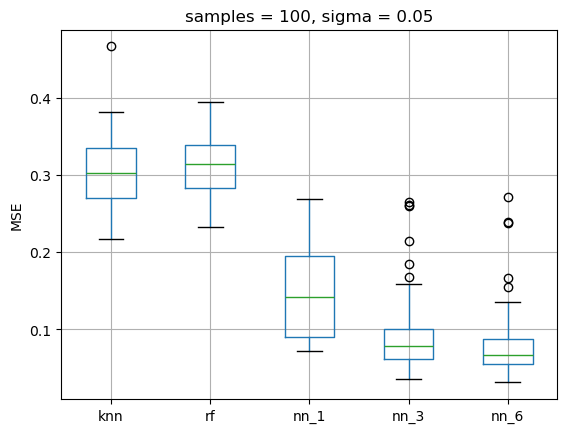

In [18]:
results = compare(['knn', 'rf', 'nn_1', 'nn_3', 'nn_6'], 100, 0.05)
plot_results(results)

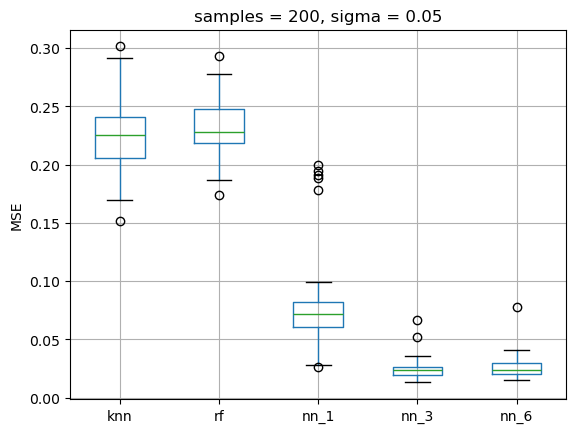

In [19]:
results = compare(['knn', 'rf', 'nn_1', 'nn_3', 'nn_6'], 200, 0.05)
plot_results(results)

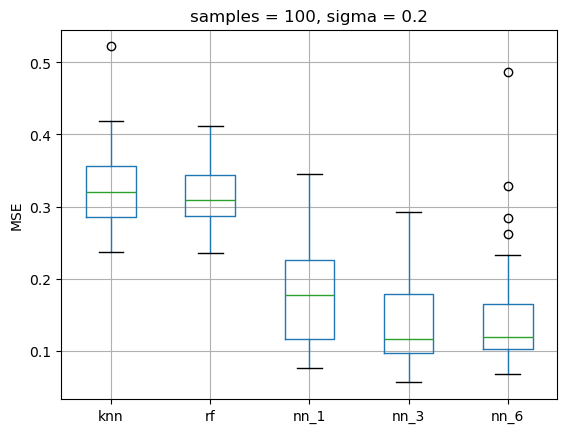

In [20]:
results = compare(['knn', 'rf', 'nn_1', 'nn_3', 'nn_6'], 100, 0.2)
plot_results(results)

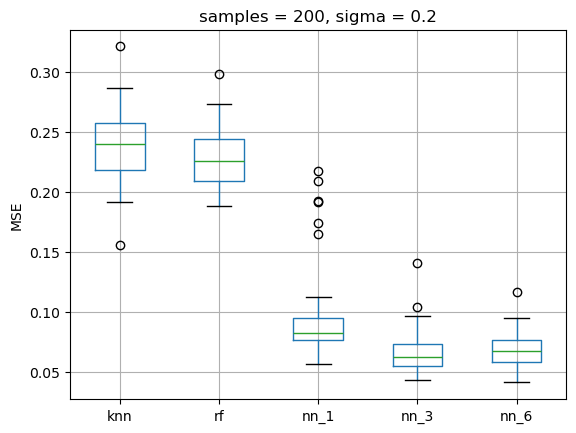

In [21]:
results = compare(['knn', 'rf', 'nn_1', 'nn_3', 'nn_6'], 200, 0.2)
plot_results(results)